# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from joblib import dump

In [2]:
X_train = np.load('../data/X_train.npy')
X_train_all_indices = np.load('../data/X_train_all_indices.npy')
X_train_selected_indices = np.load('../data/X_train_selected_indices.npy')
y_train = np.load('../data/y_train.npy')

# Model Training

In [3]:
model = LinearRegression().fit(X_train, y_train)
model_all_indices = LinearRegression().fit(X_train_all_indices, y_train)
model_selected_indices = LinearRegression().fit(X_train_selected_indices, y_train)

# Model Evaluation

In [4]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

In [5]:
y_pred = model.predict(X_test)
y_pred_all_indices = model_all_indices.predict(X_test_all_indices)
y_pred_selected_indices = model_selected_indices.predict(X_test_selected_indices)

In [6]:
print(y_pred.min(), y_pred.max(), y_pred.mean(), y_pred.std())
print(y_pred_all_indices.min(), y_pred_all_indices.max(), y_pred_all_indices.mean(), y_pred_all_indices.std())
print(y_pred_selected_indices.min(), y_pred_selected_indices.max(), y_pred_selected_indices.mean(), y_pred_selected_indices.std())

-35.43559186259555 26.15217655890145 12.017735579130752 7.075849577032074
-3.5745762845172635 35.56891832801523 11.94029306590104 7.980664934834155
-27.682202097628284 29.357613325837406 12.03400491149864 7.449421984143965


In [7]:
results = pd.DataFrame(columns=['Model', 'MAE'])
results.loc[0] = ['LinearRegression10Bands', mean_absolute_error(y_test, y_pred)]
results.loc[1] = ['LinearRegressionAllIndices', mean_absolute_error(y_test, y_pred_all_indices)]
results.loc[2] = ['Linear Regression Selected Indices', mean_absolute_error(y_test, y_pred_selected_indices)]
results.to_csv('model_performances.csv', mode='a', index=False, header=False)
results

,Model,MAE
0,LinearRegression10Bands,6.367812
1,LinearRegressionAllIndices,5.344201
2,Linear Regression Selected Indices,6.079227


In [8]:
dump(model, '../models/linear_regression_10_bands.joblib')
dump(model_all_indices, '../models/linear_regression_all_bands.joblib')
dump(model_selected_indices, '../models/linear_regression_selected_bands.joblib')

['../models/linear_regression_selected_bands.joblib']

## Visualization of True Labels vs. Predictions

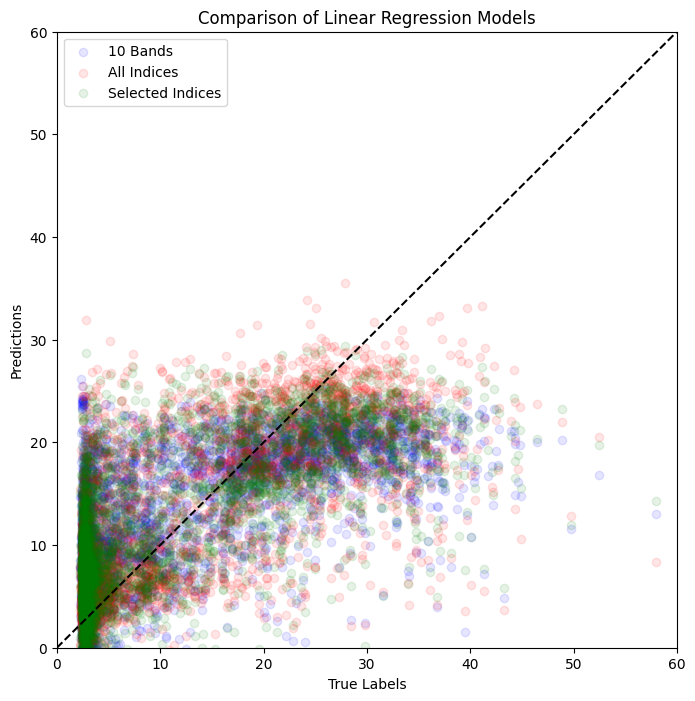

In [24]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color="blue", alpha=0.1, label="10 Bands")
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1, label="All Indices")
plt.scatter(y_test, y_pred_selected_indices, color="green", alpha=0.1, label="Selected Indices")
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Comparison of Linear Regression Models")
plt.legend()

plt.show()

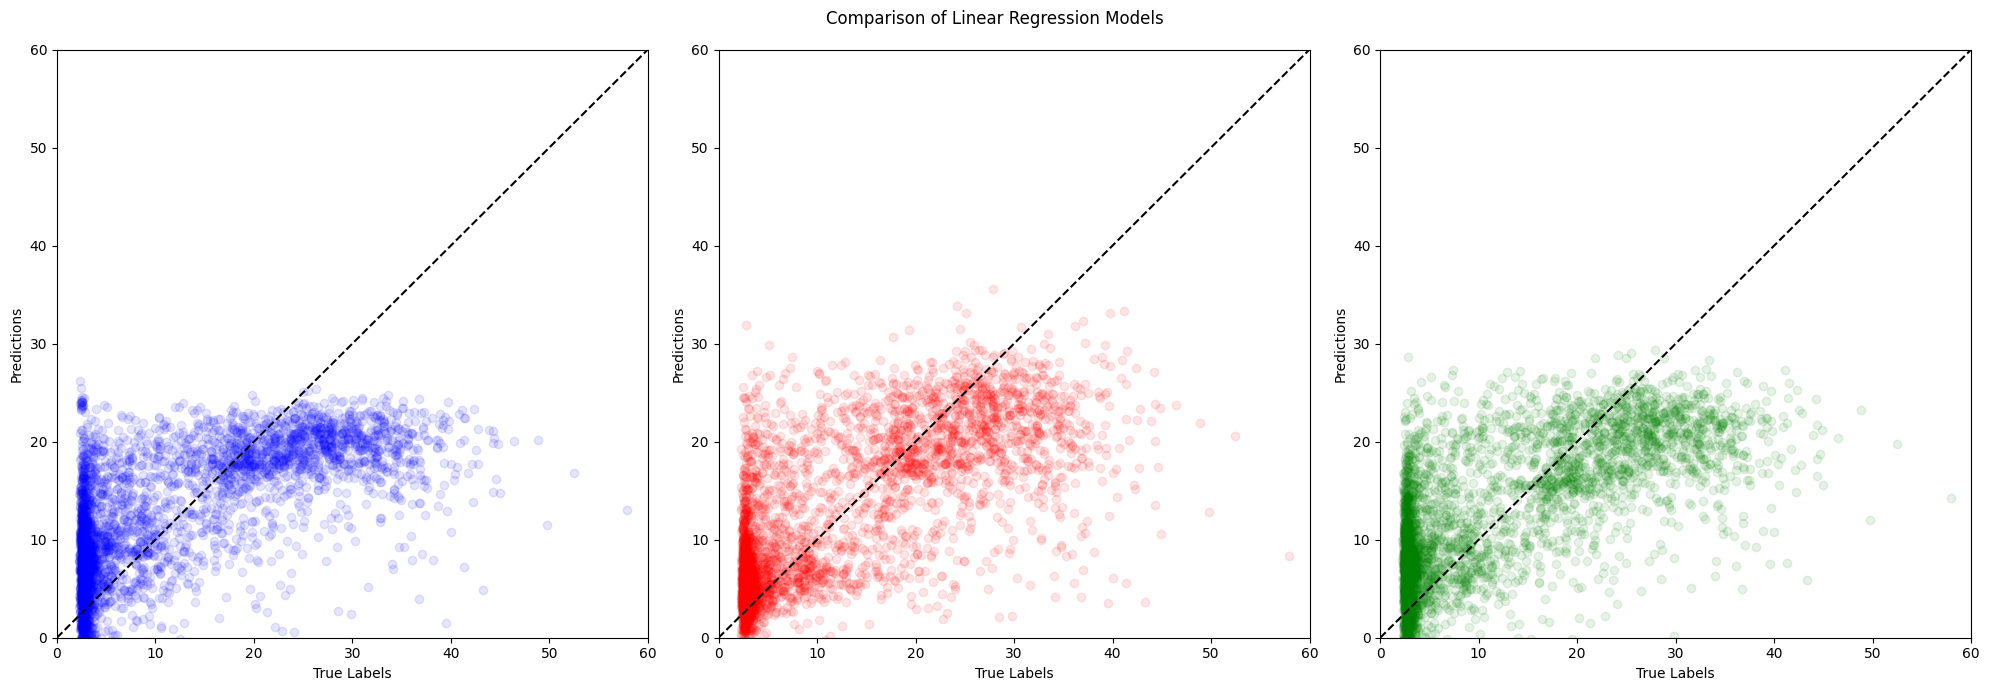

In [29]:
# Create a figure and specify the layout to have 1 row and 2 columns
fig = plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)  # Arguments are: nrows, ncols, index
plt.scatter(y_test, y_pred, color="blue", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_all_indices, color="red", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_selected_indices, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.suptitle("Comparison of Linear Regression Models")
plt.tight_layout()
plt.show()